In [1]:
from scipy.io import loadmat
import numpy as np
from nilearn import *
import nilearn
import matplotlib.pyplot as plt
import nibabel as nibd
import time
from IPython.display import display, clear_output

aal_atlas = datasets.fetch_atlas_aal()

In [2]:
# The fMRI background image
brain_img = image.load_img('../../data/wrsHU0303-0901-00009-000001-01.hdr')

# Graphs to be plotted
Graphs303_Sparsity = loadmat('../../graph_learning/graph_data/303_graph_SparWindowWeighted.mat')
Graphs303Spar = Graphs303_Sparsity['Graphs_W']

# The graph signal to be plotted
gft303 = loadmat('./gft/303_GFTFiltered.mat')

# The 3 bands of interest
Spar303 = gft303['Spar']
LPF = Spar303['LPF']
BPF = Spar303['BPF']
HPF = Spar303['HPF']
LPF = LPF[0][0]
BPF = BPF[0][0]
HPF = HPF[0][0]

# Size parameters
N = LPF.shape[0]
T = LPF.shape[1]

# Indices for empathy high and low
idxLow = 73
idxHigh = 242

In [3]:
def thres(A1,k,Num):
    A = A1
    A2 = A1
    A = np.real(A)
    N = A.shape[0]
    P = A[np.triu_indices(N, k=1)]
    S = np.sort(np.ravel(P))[::-1] # symmetric, upper triangle
    val = S[k-1]
    K = k-2
    
    while(val==0 and K>=0):
        val = S[K]
        K -= 1
    
    W1 = A2
    W1 = np.where(W1 > val, 1, 0)
    
    top = A2
    val1 = S[Num]
    W2 = np.where(top > val1, 10, 0)
    
    W = np.maximum(W1,W2)
    
    return W


In [4]:
# Extract the corresponding graphs
Spar303Low = Graphs303Spar[:,:,idxLow]
Spar303High = Graphs303Spar[:,:,idxHigh]

# Thresholding
Spar_303_Low = thres(Spar303Low,N,5)
Spar_303_High = thres(Spar303High,N,5)

In [5]:
# List of regions of interest
regions_of_interest = ['Cingulum_Ant_L', 'Cingulum_Ant_R', 'Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Mid_R', 'Frontal_Sup_L', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Sup_R', 'Fusiform_L', 'Fusiform_R', 'Hippocampus_L', 'Hippocampus_R', 'Insula_L', 'Insula_R', 'Occipital_Inf_R', 'Occipital_Inf_L', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Parietal_Inf_L', 'Parietal_Inf_R', 'Parietal_Sup_L', 'Parietal_Sup_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Precuneus_L', 'Precuneus_R', 'SupraMarginal_L', 'SupraMarginal_R', 'Temporal_Inf_L', 'Temporal_Sup_L', 'Temporal_Sup_R', 'Temporal_Inf_R', 'Thalamus_L', 'Thalamus_R']
region_strings = ["Cingulum_Ant_L", "Cingulum_Ant_R", "Amygdala_L", "Amygdala_R", "Angular_L", "Angular_R", "Frontal_Inf_Oper_L", "Frontal_Inf_Oper_R", "Frontal_Inf_Orb_L", "Frontal_Inf_Orb_R", "Frontal_Inf_Tri_L", "Frontal_Inf_Tri_R", "Frontal_Med_Orb_L", "Frontal_Med_Orb_R", "Frontal_Mid_L", "Frontal_Mid_Orb_L", "Frontal_Mid_Orb_R", "Frontal_Mid_R", "Frontal_Sup_L", "Frontal_Sup_Medial_L", "Frontal_Sup_Medial_R", "Frontal_Sup_Orb_L", "Frontal_Sup_Orb_R", "Frontal_Sup_R", "Fusiform_L", "Fusiform_R", "Hippocampus_L", "Hippocampus_R", "Insula_L", "Insula_R", "Occipital_Inf_R", "Occipital_Inf_L", "Occipital_Mid_L", "Occipital_Mid_R", "Occipital_Sup_L", "Occipital_Sup_R", "ParaHippocampal_L", "ParaHippocampal_R", "Parietal_Inf_L", "Parietal_Inf_R", "Parietal_Sup_L", "Parietal_Sup_R", "Cingulum_Post_L", "Cingulum_Post_R", "Precuneus_L", "Precuneus_R", "SupraMarginal_L", "SupraMarginal_R", "Temporal_Inf_L", "Temporal_Sup_L", "Temporal_Sup_R", "Temporal_Inf_R", "Thalamus_L", "Thalamus_R"]

# Find the indices of each region in the AAL atlas
region_indices = [aal_atlas.labels.index(name) for name in regions_of_interest]

# Load the AAL atlas image
atlas_img = nibd.load(aal_atlas.maps)

# Get region coordinates
coords, labels = nilearn.plotting.find_parcellation_cut_coords(atlas_img, return_label_names=True)
region_coords = [coords[idx] for idx in region_indices]

In [6]:
colormap = plt.get_cmap('hsv')
cmap = plt.get_cmap('viridis')
data_1d = np.random.rand(20)
vmin, vmax = 0, 1
gradient = np.linspace(1, 0, 256)
gradient = np.vstack((gradient, gradient)).T
custom_y_ticks = np.linspace(0, 1, 256)
custom_y_ticklabels = [f'{label:.2f}' for label in custom_y_ticks]

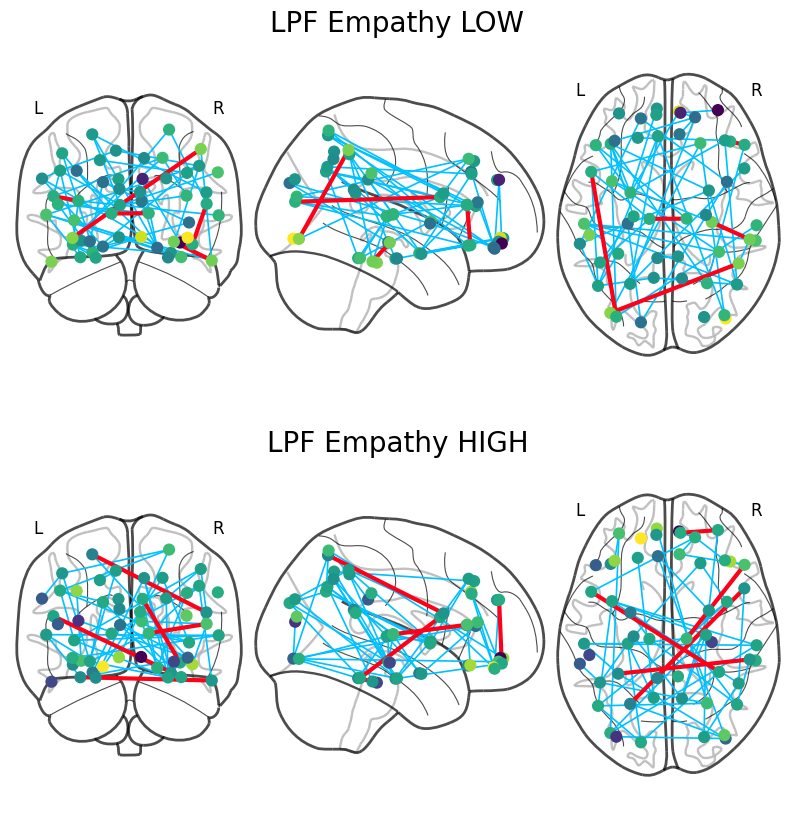

In [7]:
# Plotting for LPF
graph_signal_LOW = LPF[:,idxLow]
graph_signal_HIGH = LPF[:,idxHigh]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_LOW, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[0])
nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_HIGH, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[1])
axes[0].set_title('LPF Empathy LOW',fontsize=20)
axes[1].set_title('LPF Empathy HIGH',fontsize=20)
#plt.savefig("303_connectome.pdf", format="pdf", bbox_inches="tight")
plt.show()

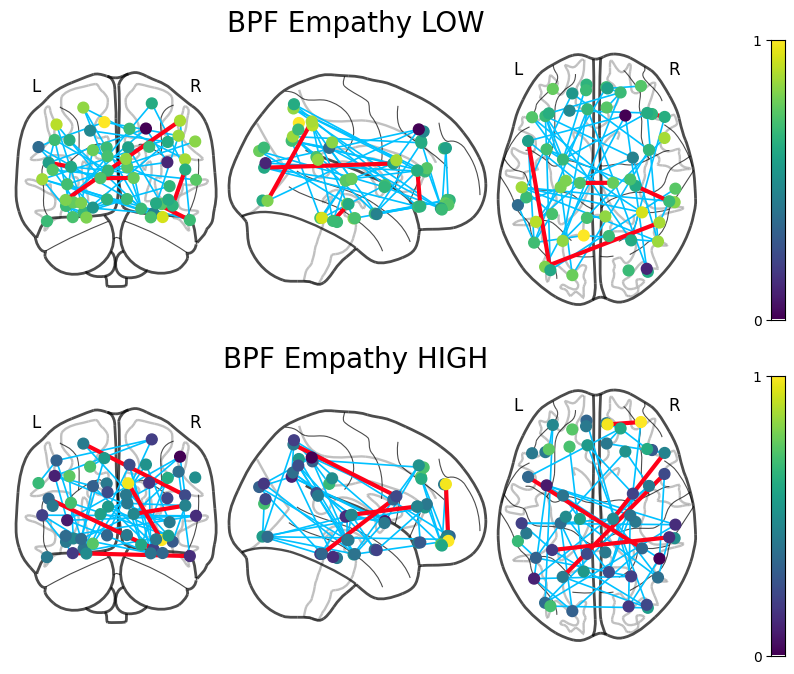

In [8]:
# Plotting for BPF
graph_signal_LOW = BPF[:,idxLow]
graph_signal_HIGH = BPF[:,idxHigh]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), gridspec_kw={'width_ratios': [1, 0.02]})

nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_LOW, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[0][0])
nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_HIGH, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[1][0])
axes[0][0].set_title('BPF Empathy LOW',fontsize=20)
axes[1][0].set_title('BPF Empathy HIGH',fontsize=20)

for i in range(2):
    axes[i][1].imshow(gradient, aspect='auto', cmap=cmap)
    axes[i][1].set_xlim(left=0, right=0.1)
    axes[i][1].get_xaxis().set_ticks([])
    axes[i][1].set_yticks([0,256])
    axes[i][1].set_yticklabels(['1','0'])

plt.savefig("BPF_Spar.pdf", format="pdf", bbox_inches="tight")
plt.show()

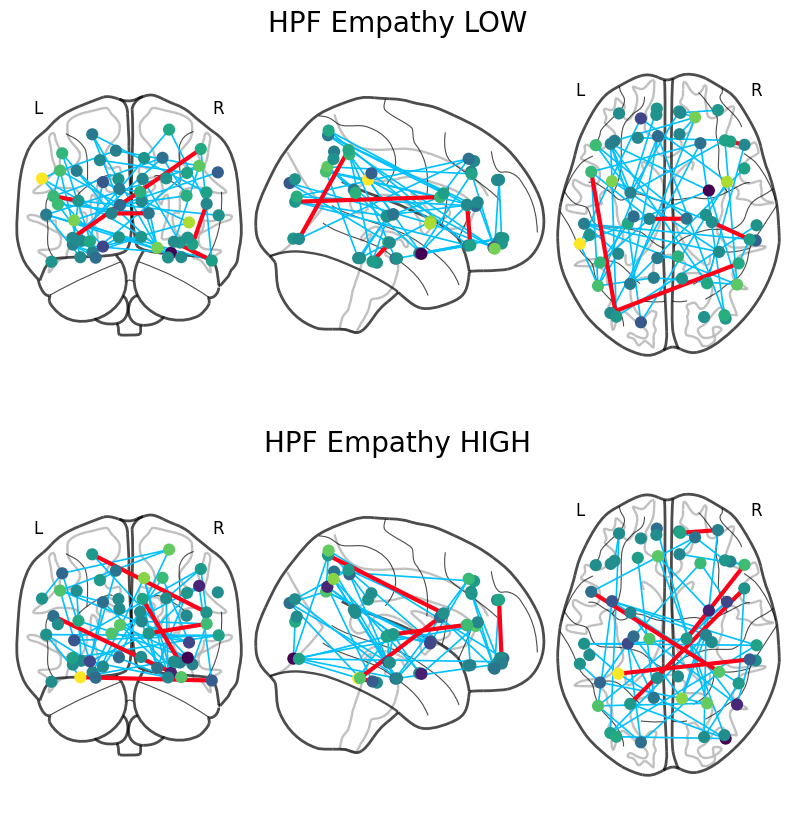

In [9]:
# Plotting for HPF
graph_signal_LOW = HPF[:,idxLow]
graph_signal_HIGH = HPF[:,idxHigh]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_LOW, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[0])
nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_HIGH, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[1])
axes[0].set_title('HPF Empathy LOW',fontsize=20)
axes[1].set_title('HPF Empathy HIGH',fontsize=20)
#plt.savefig("303_connectome.pdf", format="pdf", bbox_inches="tight")
plt.show()

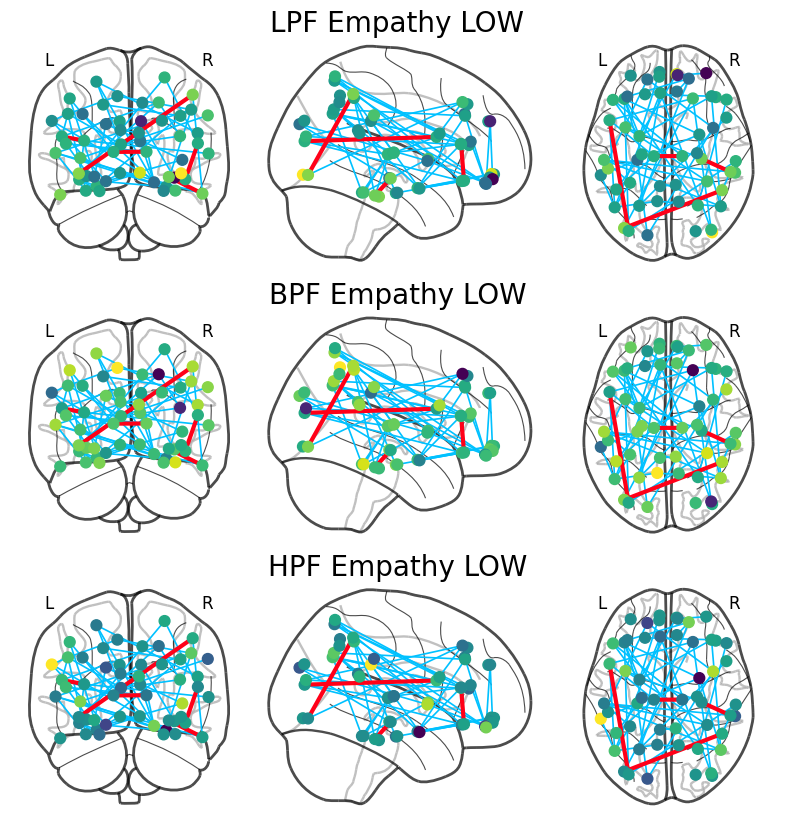

In [10]:
# Plotting for LOW
graph_signal_LPF = LPF[:,idxLow]
graph_signal_BPF = BPF[:,idxLow]
graph_signal_HPF = HPF[:,idxLow]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_LPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[0])
nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_BPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[1])
nilearn.plotting.plot_connectome(Spar_303_Low, region_coords, node_color=graph_signal_HPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[2])
axes[0].set_title('LPF Empathy LOW',fontsize=20)
axes[1].set_title('BPF Empathy LOW',fontsize=20)
axes[2].set_title('HPF Empathy LOW',fontsize=20)
plt.savefig("LOW_Spar.pdf", format="pdf", bbox_inches="tight")
plt.show()

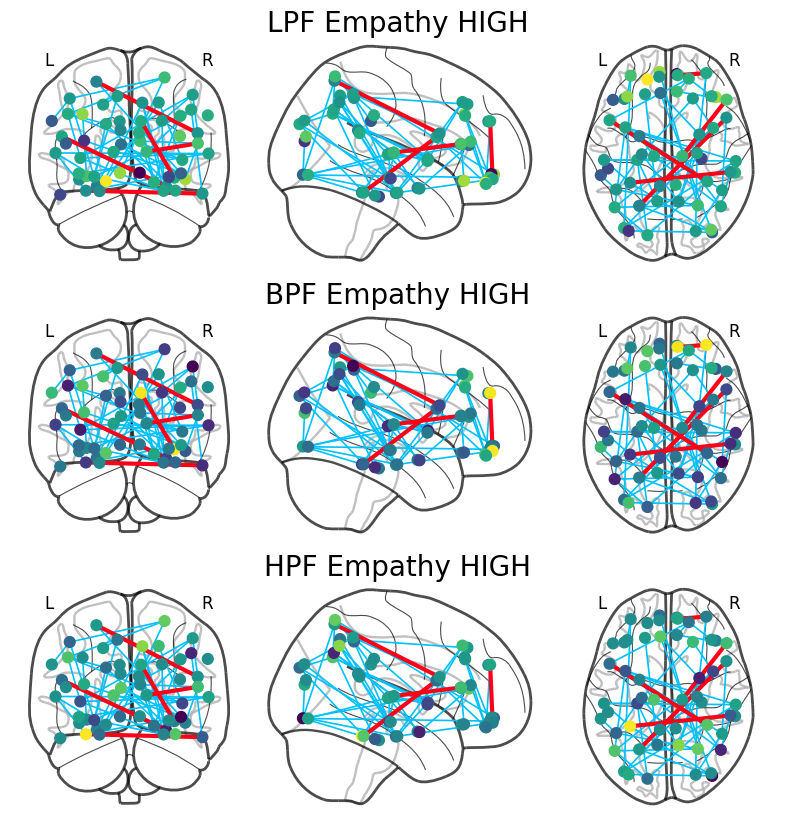

In [11]:
# Plotting for HIGH
graph_signal_LPF = LPF[:,idxHigh]
graph_signal_BPF = BPF[:,idxHigh]
graph_signal_HPF = HPF[:,idxHigh]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_LPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[0])
nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_BPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[1])
nilearn.plotting.plot_connectome(Spar_303_High, region_coords, node_color=graph_signal_HPF, node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[2])
axes[0].set_title('LPF Empathy HIGH',fontsize=20)
axes[1].set_title('BPF Empathy HIGH',fontsize=20)
axes[2].set_title('HPF Empathy HIGH',fontsize=20)
plt.savefig("HIGH_Spar.pdf", format="pdf", bbox_inches="tight")
plt.show()